<a href="https://colab.research.google.com/github/Torressk/TFM-EU/blob/main/Performance_de_jugadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install LanusStats

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import FontManager

import warnings
warnings.filterwarnings("ignore")

URL3 = 'https://github.com/VanillaandCream/Catamaran-Tamil/blob/master/Fonts/Catamaran-Medium.ttf?raw=true'
catamaran2 = FontManager(URL3)
URL = 'https://github.com/google/fonts/blob/main/ofl/fjallaone/FjallaOne-Regular.ttf?raw=true'
robotto_regular = FontManager(URL)
URL2 = 'https://github.com/VanillaandCream/Catamaran-Tamil/blob/master/Fonts/Catamaran-ExtraBold.ttf?raw=true'
catamaran = FontManager(URL2)
URL4 = 'https://github.com/google/fonts/blob/main/ofl/bungeeinline/BungeeInline-Regular.ttf?raw=true'
titulo = FontManager(URL4)

In [ ]:
dfs = pd.read_html('https://fbref.com/en/players/e7fcf289/Florian-Wirtz')

In [ ]:
percentiles = dfs[0]

In [ ]:
percentiles

,Statistic,Per 90,Percentile
0,Non-Penalty Goals,0.41,92.0
1,npxG: Non-Penalty xG,0.32,84.0
2,Shots Total,2.66,75.0
3,Assists,0.44,99.0
4,xAG: Exp. Assisted Goals,0.30,87.0
5,npxG + xAG,0.62,94.0
6,Shot-Creating Actions,6.59,98.0
7,NaN,NaN,NaN
8,Passes Attempted,69.71,99.0
9,Pass Completion %,82.5%,91.0


In [ ]:
df_percentiles = dfs[0]

In [ ]:
df_percentiles['statistic'] = df_percentiles['Statistic'].replace('npxG: Non-Penalty xG', 'npxG')

In [ ]:
df_percentiles['statistic'] = df_percentiles['Statistic'].replace('xAG: Exp. Assisted Goals', 'xAG')

In [ ]:
stats_defense = {
    'Defense': ['% of Dribblers Tackled', 'Interceptions', 'Ball Recoveries', 'Tackles', 'Blocks', 'Fouls Committed', 'Aerials Won', 'Passes Attempted', 'Clearances'],
    'Passing': ['xA: Expected Assists', 'Progressive Passes', 'Assists', 'xAG', 'Pass Completion %', 'Touches (Att Pen)'],
    'Offensive Actions': ['npxG + xAG','npxG: Non-Penalty xG', 'Progressive Carries', 'Shot-Creating Actions', 'Successful Take-Ons	', 'Successful Take-On %']
}

stats_mids = {
    'Passing': ['Progressive Passes', 'xAG', 'Pass Completion %', 'Passes into Penalty Area', 'Passes Attempted', 'Assists'],
    'Offensive Actions': ['npxG: Non-Penalty xG	', 'Progressive Carries', 'Successful Take-On %', 'Touches (Att Pen)', 'Shot-Creating Actions', 'Shots Total'],
    'Defensive Actions': ['% of Dribblers Tackled', 'Interceptions', 'Ball Recoveries', 'Fouls Committed', 'Tackles', 'Blocks']
}

stats_forwards = {
    'Offensive Actions': ['npxG', 'npxG + xAG', 'Shots Total','Shots on Target %', 'npxG/Shot', 'Shot-Creating Actions	', 'Touches (Att Pen)', 'Progressive Carries'],
    'Passing': ['xA: Expected Assists', 'Progressive Passes', 'Passes into Penalty Area', 'Progressive Passes Rec	'],
    'Defense': ['Tkl+Int', 'Blocks','Tackles (Att 3rd)']
}

In [ ]:
dataframes = []

for key in stats_mids.keys():
    placeholder = df_percentiles[df_percentiles['statistic'].isin(stats_mids[key])].drop_duplicates().reset_index(drop=True)
    placeholder['Percentile'] = placeholder['Percentile'].astype(int)
    placeholder['color'] = np.where(placeholder['Percentile'] < 20, 'red',
                                    np.where((placeholder['Percentile'] >= 20) & (placeholder['Percentile'] < 40), 'orange',
                                        np.where((placeholder['Percentile'] >= 40) & (placeholder['Percentile'] < 60), 'yellow',
                                            np.where((placeholder['Percentile'] >= 60) & (placeholder['Percentile'] < 80), 'lightgreen', 'green'))))
    dataframes.append(placeholder)

dataframes.reverse()

In [ ]:
dataframes.reverse()

In [ ]:
len(dataframes)

3

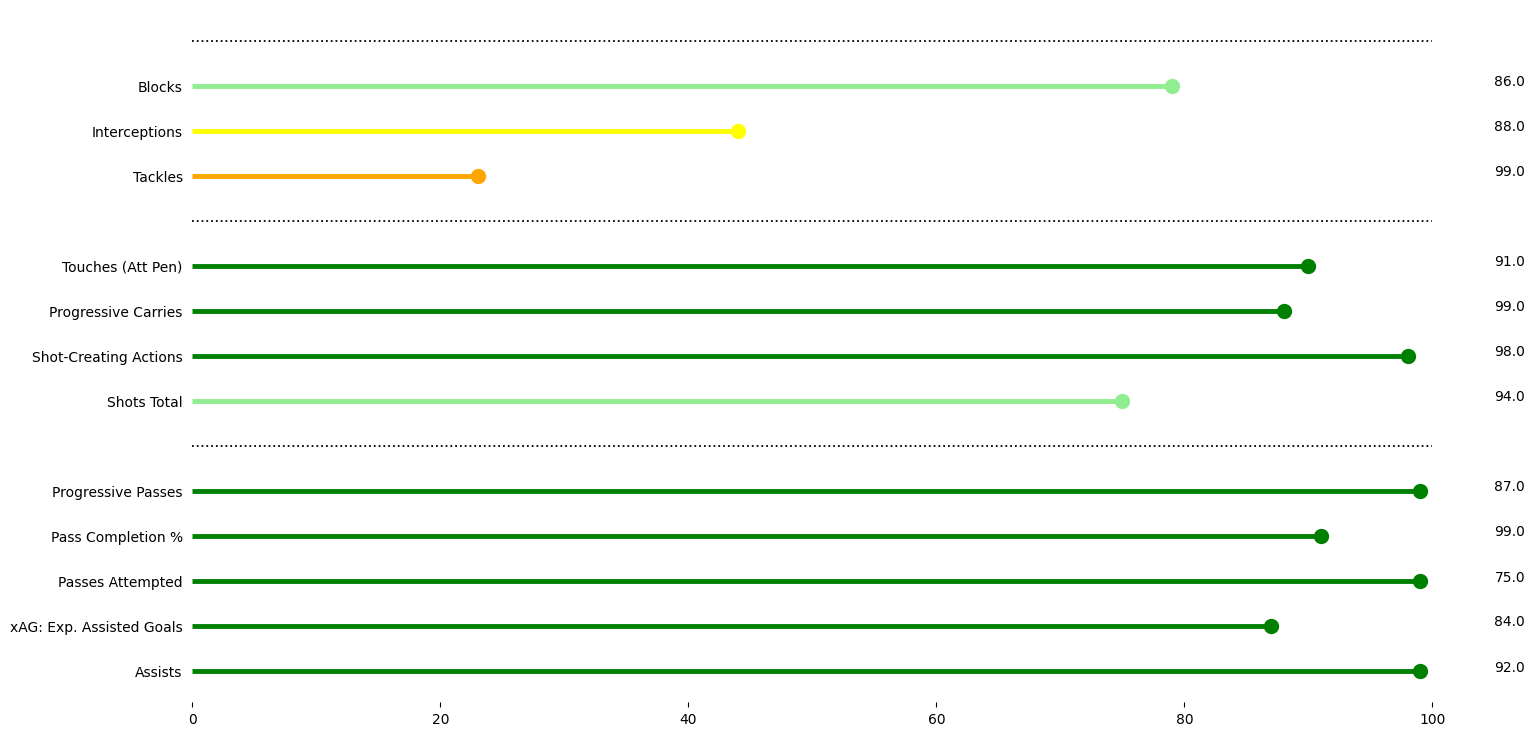

In [ ]:
contador = 0
yticks_positions = []
yticks_labels = []
lineas_punteadas = []
valores_estadisticas = []
valores_percentiles = []

fig, ax = plt.subplots(figsize=(16,9))

intervalos = [0, 20, 40, 60, 80, 100]
colores = ['red', 'orange', 'yellow', 'lightgreen', 'green']

for df in dataframes:
    for i in range(len(df)):
        plt.hlines(y=contador+i,xmin=0,xmax=df['Percentile'][i], colors=df['color'][i], linewidth=3.5)
        plt.plot(df['Percentile'][i], contador+i, "o", color=df['color'][i], markersize=10)
    yticks_positions.extend(np.arange(contador, contador+df.shape[0]))  # Extender la lista de posiciones de ticks
    yticks_labels.extend(df['Statistic'])
    valores_estadisticas.extend(df['Per 90'])
    valores_percentiles.extend(df['Percentile'])
    plt.axhline(contador+df.shape[0], ls=':', color='black', lw=1.3)
    lineas_punteadas.append(contador+df.shape[0])
    ax.set_xlim(0,100)
    contador += df.shape[0]+1

plt.yticks(yticks_positions, yticks_labels)


ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='y', which='both', left=False, right=False)


for linea in lineas_punteadas:
    ax.text(95, linea-.5, '')

for i in range(0,len(yticks_positions)):
    ax.text(105, yticks_positions[i], percentiles['Percentile'].dropna().values[i])


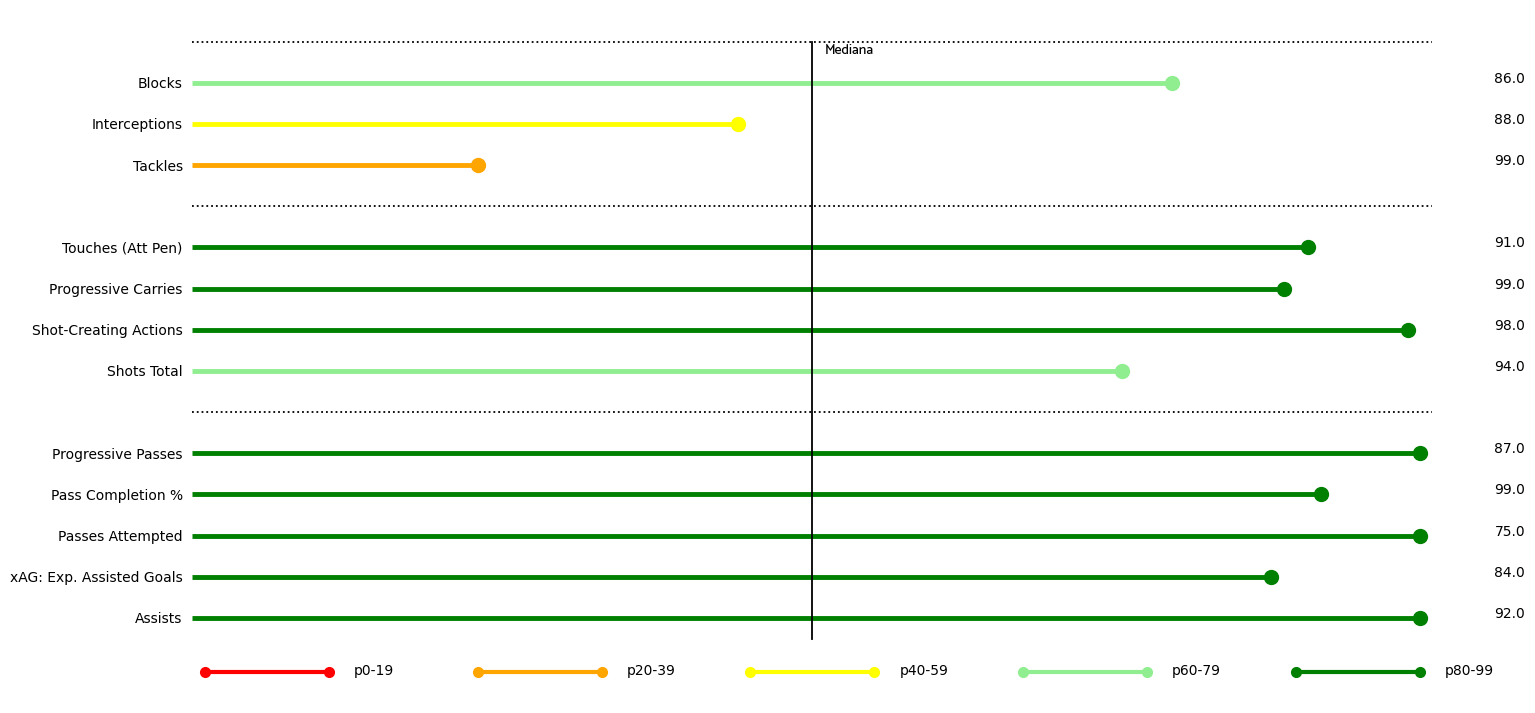

In [ ]:
contador = 0
yticks_positions = []
yticks_labels = []
lineas_punteadas = []
valores_estadisticas = []
valores_percentiles = []

fig, ax = plt.subplots(figsize=(16,9))

intervalos = [0, 20, 40, 60, 80, 100]
colores = ['red', 'orange', 'yellow', 'lightgreen', 'green']

for df in dataframes:
    for i in range(len(df)):
        plt.hlines(y=contador+i,xmin=0,xmax=df['Percentile'][i], colors=df['color'][i], linewidth=3.5)
        plt.plot(df['Percentile'][i], contador+i, "o", color=df['color'][i], markersize=10)
    yticks_positions.extend(np.arange(contador, contador+df.shape[0]))  # Extender la lista de posiciones de ticks
    yticks_labels.extend(df['Statistic'])
    valores_estadisticas.extend(df['Per 90'])
    valores_percentiles.extend(df['Percentile'])
    plt.axhline(contador+df.shape[0], ls=':', color='black', lw=1.3)
    lineas_punteadas.append(contador+df.shape[0])
    ax.set_xlim(0,100)
    contador += df.shape[0]+1

plt.yticks(yticks_positions, yticks_labels)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='y', which='both', left=False, right=False)


for linea in lineas_punteadas:
    ax.text(80, linea-1, '')

for i in range(0,len(yticks_positions)):
    ax.text(105, yticks_positions[i], percentiles['Percentile'].dropna().values[i])




ax.plot([50,50], [-0.5,len(yticks_labels)+2],color='black', lw=1.3)
ax.text(51,len(yticks_labels)+1.7, 'Mediana', fontproperties=catamaran2.prop, size=10)

ubicacion_y = -1.3
ubicacion_x_inicial = 1
for i in range(len(colores)):
    ax.plot([ubicacion_x_inicial,ubicacion_x_inicial+10], [ubicacion_y,ubicacion_y], color=colores[i], lw=3)
    ax.plot(ubicacion_x_inicial, ubicacion_y, "o", color=colores[i], markersize=7)
    ax.plot(ubicacion_x_inicial+10, ubicacion_y, "o", color=colores[i], markersize=7)
    ax.text(ubicacion_x_inicial+12, ubicacion_y, f'p{intervalos[i]}-{intervalos[i+1]-1}', va='center')
    ubicacion_x_inicial += 22
ax.set_xticks([])

#plt.title("Premier League 16/17")
plt.savefig('thumbnail-3.png', dpi=300, bbox_inches='tight')
plt.show()